In [1]:
import newleg, inverse, xyzfield
import geofield
import numpy, scipy
import fibonacci_sphere
from matplotlib import pyplot

In [2]:
from importlib import reload
reload(geofield); reload(newleg); reload(xyzfield); reload(inverse); reload(fibonacci_sphere)

<module 'fibonacci_sphere' from '/home/josecper/Programs/python/fibonacci_sphere.py'>

In [3]:
chaos=geofield.ChaosData("../data/CHAOS5X/gauss_coeff_chaos5x.dat")

In [4]:
theta,phi=fibonacci_sphere.grid(n=4000)

In [5]:
x,y,z=xyzfield.xyzfieldv2(chaos.gcomp[0,1:],phi,theta)
dec, inc, intensity, horizontal = xyzfield.xyz2difh(x,y,z)

In [6]:
ggg=numpy.vstack((theta,phi,dec,inc,intensity)).transpose()
numpy.savetxt("../data/dif_synth.txt", ggg, delimiter="\t", newline="\n")


In [7]:
!python corrupt.py --filename ../data/dif_synth.txt --out ../data/dif_corrupt.txt --density 0.80

corrupted=numpy.loadtxt("../data/dif_corrupt.txt").transpose()
thetaf,phif,decf,incf,intf=corrupted[0], corrupted[1], corrupted[2], corrupted[3], corrupted[4]

In [13]:
g_synthf=inverse.invert_dif(thetaf,phif,(decf,incf,intf), order=13, steps=10)

/usr/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3644: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  xx = x[x.shape[0]/2,:]


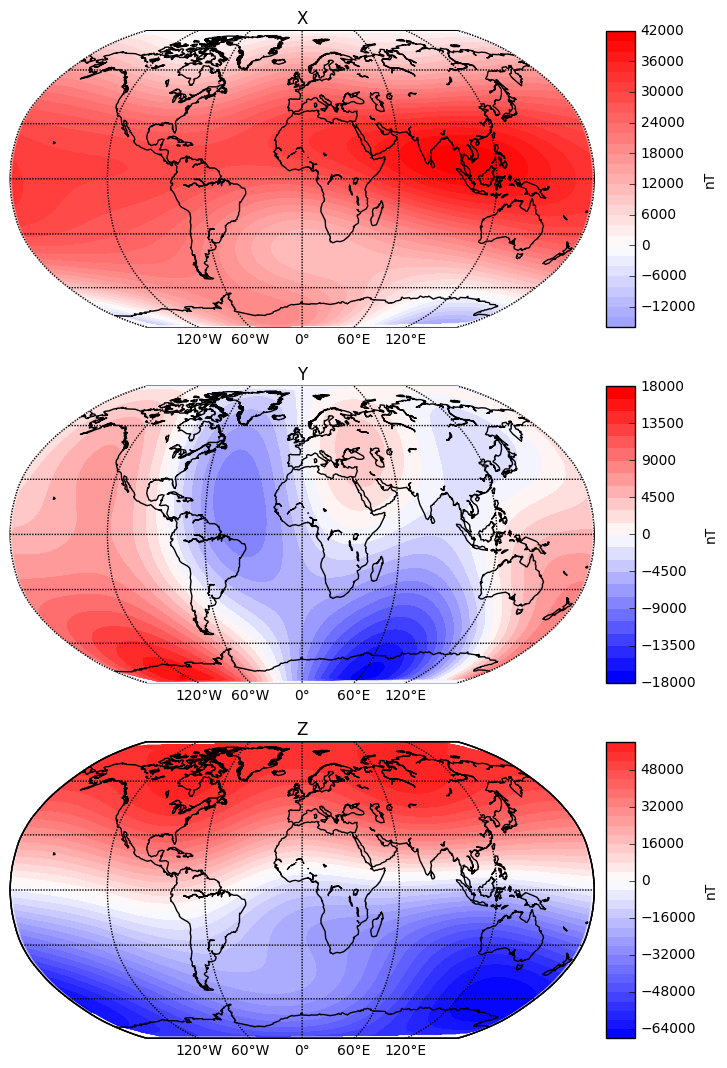

In [14]:
xs,ys,zs=xyzfield.xyzfieldv2(g_synthf,phi,theta)
pyplot.show(xyzfield.xyzcontour(theta,phi,xs,ys,zs,regular=False))

In [9]:
g_synth=inverse.invert_dif(theta,phi,(dec,inc,intensity), order=13, steps=10)

In [2]:
from mpl_toolkits.basemap import Basemap

In [3]:
base=Basemap(projection="robin", lon_0=0.0, resolution="l")

fig, ax = pyplot.subplots()
#base.drawcoastlines(ax=ax)
base.fillcontinents(color='coral',lake_color='aqua')
base.drawparallels(numpy.arange(-60.,90.,30.),ax=ax)
base.drawmeridians(numpy.arange(0.,420.,60.),labels=[0,0,0,1],fontsize=10,ax=ax)
base.drawmapboundary(ax=ax)

theta_dec=theta[~numpy.isnan(decf)]
phi_dec=phi[~numpy.isnan(decf)]

theta_inc=theta[~numpy.isnan(incf)]
phi_inc=phi[~numpy.isnan(incf)]

theta_int=theta[~numpy.isnan(intf)]
phi_int=phi[~numpy.isnan(intf)]

base.scatter(numpy.rad2deg(phi_dec),90-numpy.rad2deg(theta_dec), latlon=True, ax=ax,
             c="#B52020", marker="o", edgecolor="None", label="Declination", alpha=0.5)
base.scatter(numpy.rad2deg(phi_inc),90-numpy.rad2deg(theta_inc), latlon=True, ax=ax,
             c="#2020B5", marker="o", edgecolor="None", label="Inclination", alpha=0.5)
base.scatter(numpy.rad2deg(phi_int),90-numpy.rad2deg(theta_int), latlon=True, ax=ax,
             c="#20B520", marker="o", edgecolor="None", label="Intensity", alpha=0.5)

pyplot.legend(loc="best", fontsize="small")
pyplot.show(fig)

NameError: name 'pyplot' is not defined